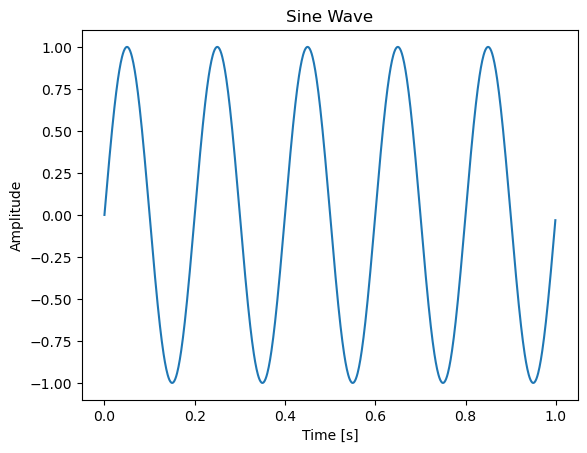

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Time specifications
fs = 1000  # Sample rate
t = np.arange(0, 1, 1/fs)  # Time vector
# Signal parameters
f = 5  # Frequency of the sine wave
A = 1  # Amplitude of the sine wave
# Generate sine wave
x = A * np.sin(2 * np.pi * f * t)
# Plot the signal
plt.plot(t, x)
plt.title("Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

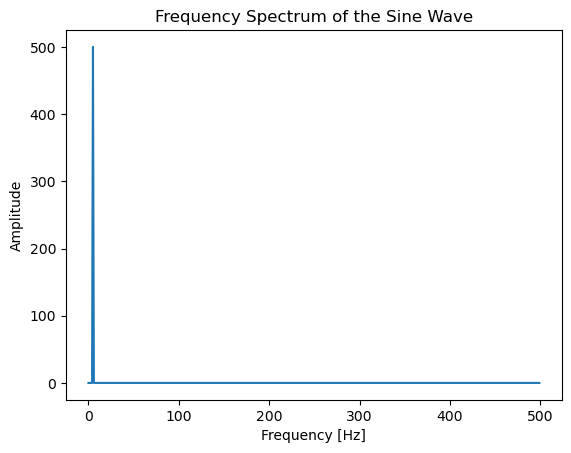

In [2]:
# Perform FFT
X = np.fft.fft(x)
# Frequency axis
frequencies = np.fft.fftfreq(len(X), 1/fs)
# Plot FFT
plt.plot(frequencies[:len(frequencies)//2], np.abs(X[:len(X)//2]))
plt.title("Frequency Spectrum of the Sine Wave")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

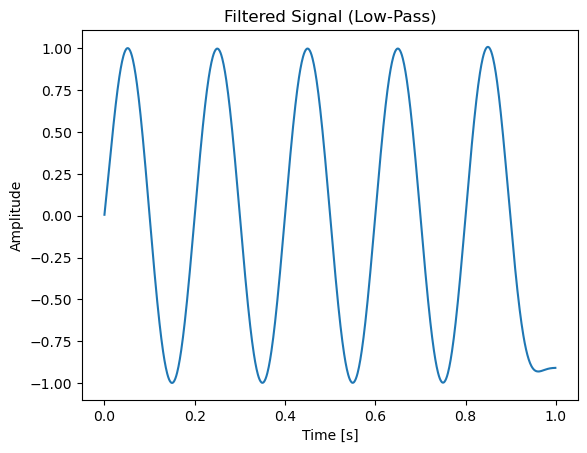

In [4]:
from scipy.signal import butter, filtfilt
# Design a low-pass Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
	nyquist = 0.5 * fs
	normal_cutoff = cutoff / nyquist
	b, a = butter(order, normal_cutoff, btype='low', analog=False)
	return b, a
# Apply filter
def lowpass_filter(data, cutoff, fs, order=5):
	b, a = butter_lowpass(cutoff, fs, order=order)
	y = filtfilt(b, a, data)
	return y
# Parameters for the filter
cutoff = 10 # Desired cutoff frequency of the filter
filtered_signal = lowpass_filter(x, cutoff, fs)
# Plot filtered signal
plt.plot(t, filtered_signal)
plt.title("Filtered Signal (Low-Pass)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

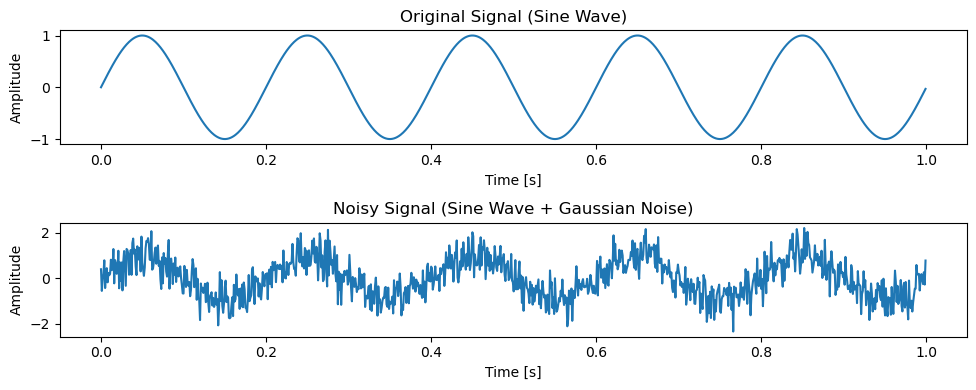

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Signal parameters
fs = 1000  # Sample rate
t = np.arange(0, 1, 1/fs)  # Time vector
f = 5  # Frequency of the sine wave
A = 1  # Amplitude of the sine wave
# Generate clean sine wave
x = A * np.sin(2 * np.pi * f * t)
# Noise parameters
mean = 0
std = 0.5  # Standard deviation of the noise
noise = np.random.normal(mean, std, x.shape)
# Add noise to the signal
noisy_signal = x + noise
# Plot the noisy signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title("Original Signal (Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.subplot(2, 1, 2)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal (Sine Wave + Gaussian Noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

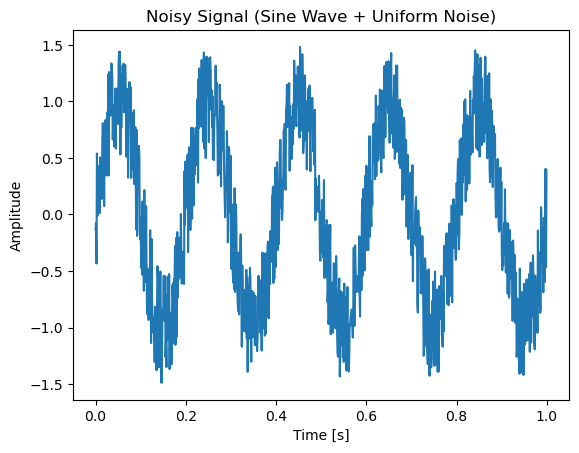

In [6]:
# Generate uniform noise
uniform_noise = np.random.uniform(-0.5, 0.5, x.shape)
# Add noise to the signal
noisy_signal_uniform = x + uniform_noise
# Plot the noisy signal
plt.plot(t, noisy_signal_uniform)
plt.title("Noisy Signal (Sine Wave + Uniform Noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

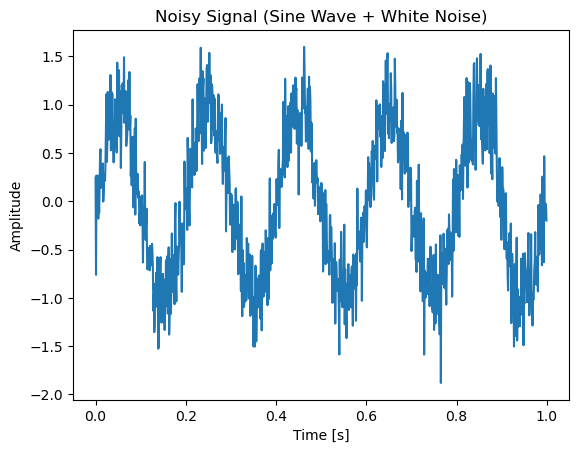

In [7]:
# White noise with mean=0 and standard deviation based on desired SNR
white_noise = np.random.normal(0, 0.3, x.shape)
noisy_signal_white = x + white_noise
# Plot the noisy signal
plt.plot(t, noisy_signal_white)
plt.title("Noisy Signal (Sine Wave + White Noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

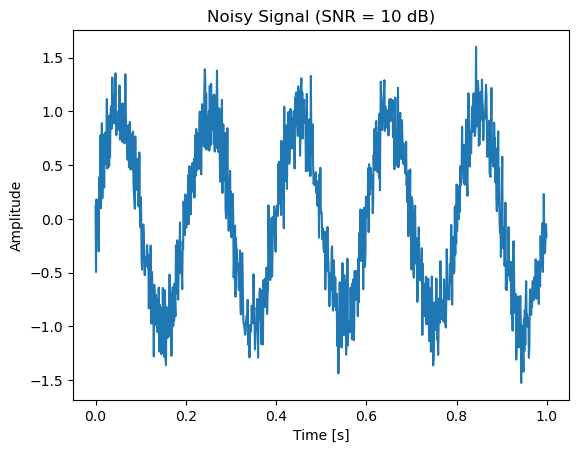

In [8]:
def add_noise_with_snr(signal, snr):
	# Calculate signal power and convert SNR from dB
	signal_power = np.mean(signal**2)
	noise_power = signal_power / (10**(snr / 10))
	# Generate white noise with calculated noise power
	noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
	# Add noise to the signal
	noisy_signal = signal + noise
	return noisy_signal
# Add noise with a specific SNR (e.g., 10 dB)
snr = 10 # SNR in decibels
noisy_signal_snr = add_noise_with_snr(x, snr)
# Plot the noisy signal
plt.plot(t, noisy_signal_snr)
plt.title(f"Noisy Signal (SNR = {snr} dB)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

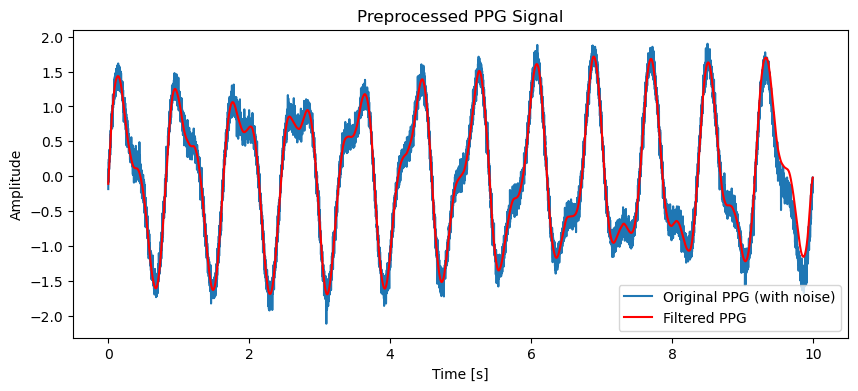

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
# Simulating a PPG signal (this is just an example)
fs = 1000 # Sampling frequency
t = np.arange(0, 10, 1/fs) # Time vector for 10 seconds
ppg_signal = 1.2 * np.sin(2 * np.pi * 1.2 * t) + 0.5 * np.sin(2 * np.pi * 2.5 * t) # Simulated PPG
# Add some noise
ppg_signal += np.random.normal(0, 0.1, ppg_signal.shape)
# Preprocessing - Apply a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=2):
	nyquist = 0.5 * fs
	low = lowcut / nyquist
	high = highcut / nyquist
	b, a = butter(order, [low, high], btype='band')
	return b, a
def bandpass_filter(data, lowcut, highcut, fs, order=2):
	b, a = butter_bandpass(lowcut, highcut, fs, order=order)
	y = filtfilt(b, a, data)
	return y
# Filter the PPG signal (keep heart rate frequencies ~ 0.5-10 Hz)
filtered_ppg = bandpass_filter(ppg_signal, 0.5, 10, fs)
# Plot original and filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, ppg_signal, label="Original PPG (with noise)")
plt.plot(t, filtered_ppg, label="Filtered PPG", color='r')
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Preprocessed PPG Signal")
plt.show()

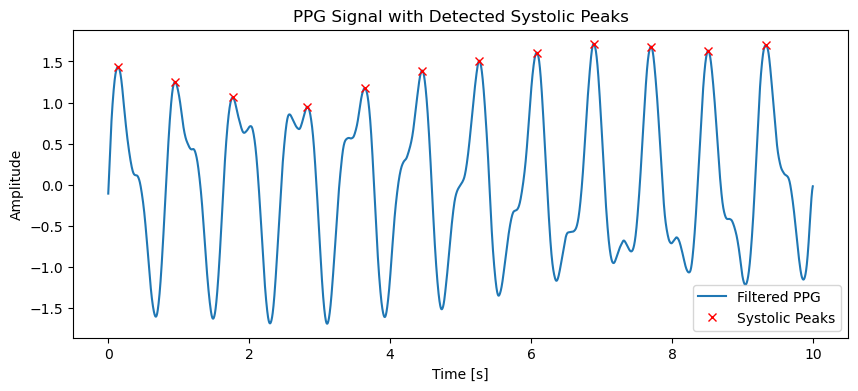

Estimated Heart Rate: 71.78 bpm


In [10]:
from scipy.signal import find_peaks
# Peak detection (systolic peaks in the PPG signal)
peaks, _ = find_peaks(filtered_ppg, distance=fs//2, height=0.5)
# Plot PPG signal with detected peaks
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_ppg, label="Filtered PPG")
plt.plot(t[peaks], filtered_ppg[peaks], 'rx', label="Systolic Peaks")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("PPG Signal with Detected Systolic Peaks")
plt.show()
# Heart rate (HR) calculation from peaks
peak_intervals = np.diff(peaks) / fs  # Time intervals between peaks
heart_rate = 60 / np.mean(peak_intervals)  # Convert to beats per minute (bpm)
print(f"Estimated Heart Rate: {heart_rate:.2f} bpm")

In [11]:
def estimate_bp(ptt, c1=0.5, c2=80):
	"""
	Estimate systolic blood pressure (SBP) using an empirical formula based on PTT.
	c1 and c2 are constants from an empirical model.
	"""
	return c1 / ptt + c2 # Simplified empirical formula
# Suppose we have an estimated PTT (for example, 0.25 seconds)
ptt = 0.25 # This should be calculated from the ECG and PPG signals
# Estimate systolic BP
estimated_sbp = estimate_bp(ptt)
print(f"Estimated Systolic Blood Pressure: {estimated_sbp:.2f} mmHg")

Estimated Systolic Blood Pressure: 82.00 mmHg


In [12]:
from sklearn.linear_model import LinearRegression
# Example training data (you will need real PPG, BP data)
# Features from the signal
features = np.array([[heart_rate, ptt], [heart_rate, ptt], ...])
labels = np.array([120, 115, 130, ...])  # Systolic BP values
# Train a regression model
model = LinearRegression()
model.fit(features, labels)
# Use the model to predict BP
predicted_bp = model.predict([[heart_rate, ptt]])
print(f"Predicted Systolic Blood Pressure: {predicted_bp[0]:.2f} mmHg")

ModuleNotFoundError: No module named 'sklearn'